# 🏥 HEALTHCARE DATA ANALYSIS 
**Tools:** Python (NumPy, Pandas, Matplotlib, Seaborn) + ipywidgets for dropdown interactivity.

This notebook is designed for a data analyst: it contains Exploratory Data Analysis business questions, data cleaning, statistical analysis, a NumPy-based predictive model, static dashboards, and interactive dropdown filters.


## Problem Definition & Business Understanding
**Business Problem**
Hospitals and healthcare providers want to understand which factors influence patient cost, length of stay, outcomes, and resource utilization. This helps in optimizing patient care, reducing costs, and improving hospital efficiency.

**Stakeholders**
- Hospital Administrators (reduce costs, improve care)
- Finance Team (budgeting and forecasting)
- Doctors & Care Managers (understand patient risk factors)
- Insurance Companies (optimize coverage and claims)
  
**Goals of the Analysis:**
- Identify high-cost diseases and hospitals.
- Understand the role of demographics (age, gender).
- Predict drivers of cost using basic modeling.
- Create a dashboard-style summary for decision-makers.

## Data Dictionary 

| Column           | Type     | Description                                       |
| ---------------- | -------- | ------------------------------------------------- |
| PatientID        | int      | Unique identifier for each patient                |
| Age              | int      | Age of the patient (in years)                     |
| Gender           | category | Gender of the patient (Male/Female)               |
| Disease          | category | Diagnosed disease (e.g., Diabetes, Heart Disease) |
| Hospital         | category | Name of hospital where patient was treated        |
| Length\_of\_Stay | int      | Number of days patient stayed in hospital         |
| Doctor\_Visits   | int      | Number of doctor consultations during treatment   |
| Insurance        | category | Insurance type (Yes / No / Self-pay)              |
| Outcome          | category | Treatment result (Recovered / Readmission / Dead) |
| Cost             | float    | Total treatment cost (in USD)                     |


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Health_Care.csv')
df.head()

,PatientID,Age,Gender,Disease,Length_of_Stay,Cost,Outcome,Hospital,Doctor_Visits,Insurance
0,1,67,Male,Stroke,17,8412.92,Recovered,City Hospital,9,Yes
1,2,18,Male,Diabetes,34,13704.80,Recovered,City Hospital,3,Yes
2,3,84,Female,COVID-19,38,18849.82,Dead,Care Clinic,3,Yes
3,4,58,Male,Hypertension,22,15187.69,Recovered,General Hospital,4,Yes
4,5,87,Male,Heart Disease,39,17942.71,Recovered,City Hospital,1,Yes


In [133]:
print("\033[1m Summary Statistics: \033[0m")
df.describe()

 Summary Statistics: 


,PatientID,Age,Length_of_Stay,Cost,Doctor_Visits
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,44.949500,19.677500,11976.883370,7.409500
std,577.494589,26.143559,11.235195,3754.273709,3.990961
min,1.000000,1.000000,1.000000,1000.000000,1.000000
25%,500.750000,23.000000,10.000000,9357.902500,4.000000
50%,1000.500000,45.000000,20.000000,11901.550000,7.000000
75%,1500.250000,68.000000,29.000000,14665.370000,11.000000
max,2000.000000,89.000000,39.000000,22179.700000,14.000000


In [134]:
print("\033[1m Detail Information : \033[0m")
df.info()

 Detail Information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PatientID       2000 non-null   int64   
 1   Age             2000 non-null   int64   
 2   Gender          2000 non-null   object  
 3   Disease         2000 non-null   object  
 4   Length_of_Stay  2000 non-null   int64   
 5   Cost            2000 non-null   float64 
 6   Outcome         2000 non-null   object  
 7   Hospital        2000 non-null   object  
 8   Doctor_Visits   2000 non-null   int64   
 9   Insurance       2000 non-null   object  
 10  Age_Group       2000 non-null   category
dtypes: category(1), float64(1), int64(4), object(5)
memory usage: 158.5+ KB


## Data Cleaning & Preprocessing
- Remove duplicates, check nulls
- Created derived features: Age_Group, Cost_per_Day, High_Risk, and Visit_Intensity.
- Applied soft outlier guard (IQR) on Cost_per_Day for EDA only

In [138]:
df = df.drop_duplicates().copy()
missing = df.isna().sum().sum()
dupes = df.duplicated().sum()
print(f"\033[1m✅ Data Cleaning Done\033[0m\nMissing Values: {missing}\nDuplicate Rows: {dupes}\nRows: {df.shape[0]}, Columns: {df.shape[1]}")

✅ Data Cleaning Done
Missing Values: 0
Duplicate Rows: 0
Rows: 2000, Columns: 11


## Exploratory data Analysis Bussiness Problems
Each subsection frames a business question, shows a concise analysis (with values on chart), and ends with a practical conclusion.

### 1. What is the age distribution of patients?

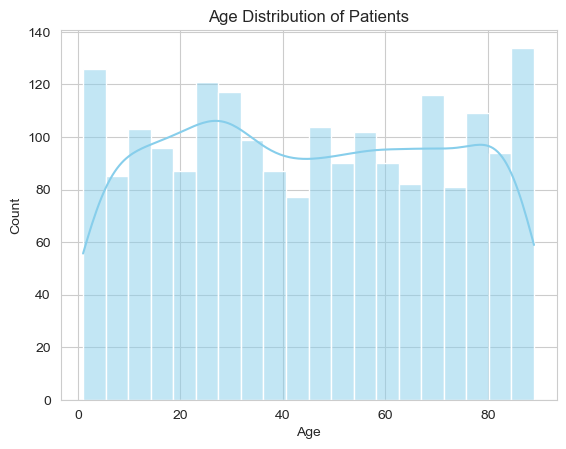

 📊 Age Distribution Insights 
Mean Age   : 44.9
Median Age : 45.0
Youngest   : 1
Oldest     : 89


In [153]:
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution of Patients")
plt.show()
print("\033[1m 📊 Age Distribution Insights \033[0m")
print(f"Mean Age   : {df['Age'].mean():.1f}")
print(f"Median Age : {df['Age'].median():.1f}")
print(f"Youngest   : {df['Age'].min()}")
print(f"Oldest     : {df['Age'].max()}")

## 2.What is the Gender distribution?

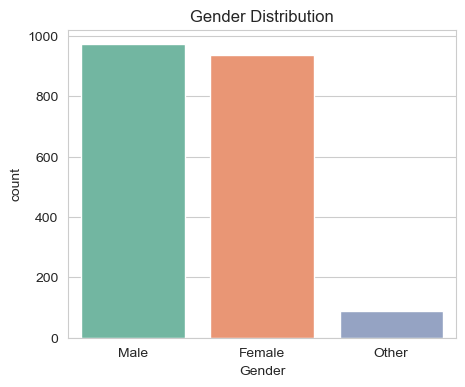

 👥 Gender Distribution:
• Male: 972 patients (48.6%)
• Female: 938 patients (46.9%)
• Other: 90 patients (4.5%)


In [155]:
if 'Gender' in df.columns:
    plt.figure(figsize=(5,4))
    ax = sns.countplot(data=df, x='Gender', hue='Gender', order=df['Gender'].value_counts().index, palette="Set2", legend=False)
    plt.title('Gender Distribution')
    plt.show()

    counts = df['Gender'].value_counts()
    print("\033[1m 👥 Gender Distribution:\033[0m")

    for g, c in counts.items():
        print(f"• {g}: {c} patients ({c/len(df)*100:.1f}%)")


## 3. Which diseases require longer hospital stays?

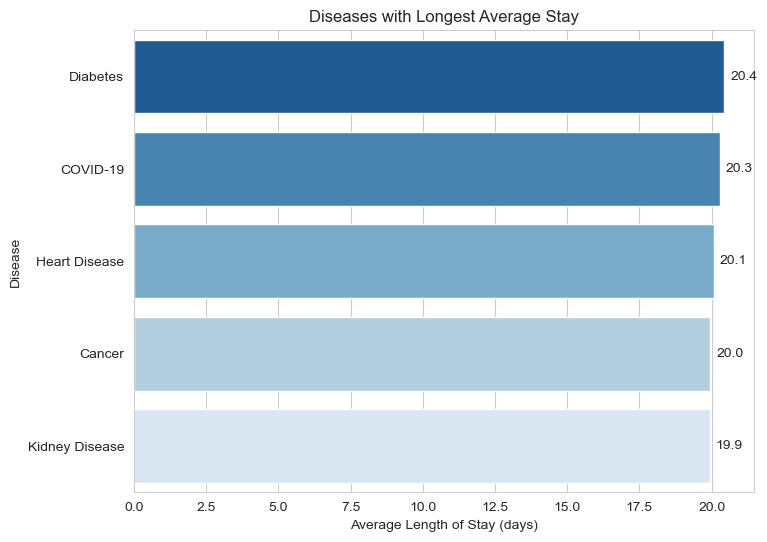

 📌 Diseases with Longest Hospital Stays:
   • Diabetes → 20.4 days
   • COVID-19 → 20.3 days
   • Heart Disease → 20.1 days
   • Cancer → 20.0 days
   • Kidney Disease → 19.9 days


In [157]:
disease_stay = (df.groupby("Disease")["Length_of_Stay"].mean().sort_values(ascending=False).head().reset_index())
plt.figure(figsize=(8,6))
ax = sns.barplot( x="Length_of_Stay",y="Disease", data=disease_stay, hue="Disease",dodge=False,palette="Blues_r", legend=False         )
plt.title("Diseases with Longest Average Stay")
plt.xlabel("Average Length of Stay (days)")
plt.ylabel("Disease")

# Add value labels
for p in ax.patches:
    ax.text(p.get_width()+0.2, p.get_y()+p.get_height()/2, f"{p.get_width():.1f}", va="center")

plt.show()
print("\033[1m 📌 Diseases with Longest Hospital Stays:\033[0m")
for i, row in disease_stay.iterrows():
    print(f"   • {row['Disease']} → {row['Length_of_Stay']:.1f} days")

## 4. Which diseases generate the highest average cost?

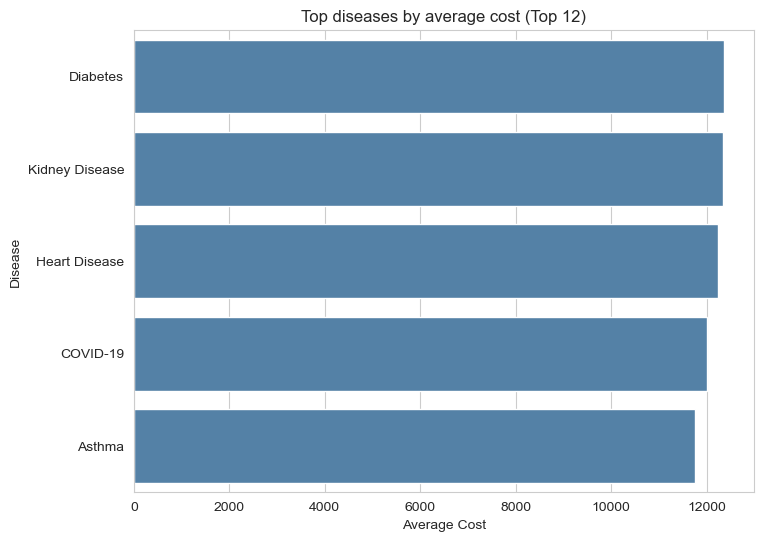

 📊 Important Insights: Diseases with the Highest Average Cost
   ➢ Diabetes: Avg Cost = 12369.37 (Cases: 251)
   ➢ Kidney Disease: Avg Cost = 12336.08 (Cases: 265)
   ➢ Heart Disease: Avg Cost = 12239.97 (Cases: 226)
   ➢ COVID-19: Avg Cost = 12001.39 (Cases: 243)
   ➢ Asthma: Avg Cost = 11743.97 (Cases: 260)


In [160]:
if 'Disease' in df.columns and 'Cost' in df.columns:
    disease_cost = (
        df.groupby('Disease')['Cost'].agg(['mean','count']).sort_values('mean', ascending=False).reset_index()
    )
    top12 = disease_cost.head()
    plt.figure(figsize=(8,6))
    sns.barplot(data=top12, y='Disease', x='mean', color="steelblue")
    plt.xlabel('Average Cost')
    plt.title('Top diseases by average cost (Top 12)')
    plt.show()
    print("\033[1m 📊 Important Insights: Diseases with the Highest Average Cost\033[0m")
    for i, row in top12.iterrows():
        print(f"   ➢ {row['Disease']}: Avg Cost = {row['mean']:.2f} (Cases: {row['count']})")


### 5. Which hospitals have highest average cost?

,Hospital,Cost
0,Specialty Center,12106.202204
1,City Hospital,11955.918935
2,General Hospital,11931.020078
3,Care Clinic,11917.466433


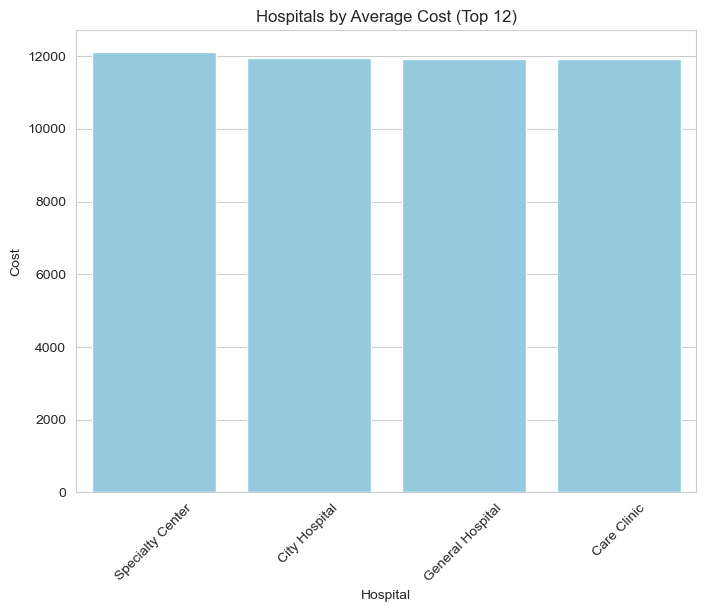

 The hospital with the highest average cost is: Specialty Center with an avg cost of 12106.20.
 Other top costly hospitals include:  City Hospital, General Hospital, Care Clinic ...


In [150]:
if 'Hospital' in df.columns and 'Cost' in df.columns:
    hosp_cost = df.groupby('Hospital')['Cost'].mean().sort_values(ascending=False).reset_index()
    top12 = hosp_cost.head(12)
    display(top12)
    plt.figure(figsize=(8,6))
    sns.barplot(x='Hospital', y='Cost', data=top12, color="skyblue")
    plt.xticks(rotation=45)
    plt.title('Hospitals by Average Cost (Top 12)')
    plt.show()
    print("\033[1m The hospital with the highest average cost is: \033[0m"
        f"{top12.iloc[0]['Hospital']} with an avg cost of {top12.iloc[0]['Cost']:.2f}.")
    print("\033[1m Other top costly hospitals include: \033[0m", ", ".join(top12['Hospital'].iloc[1:4].tolist()), "...")

### 6. Which hospitals are most efficient (low cost + short stay)?

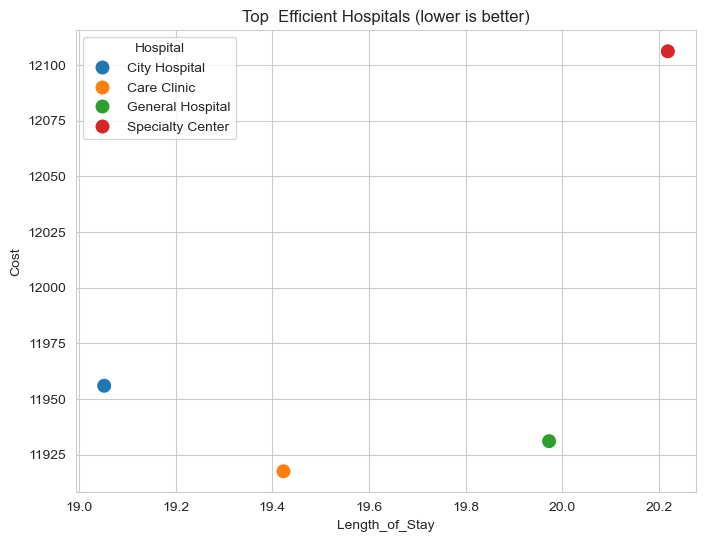

 🏥 Most Efficient Hospitals: 
        Hospital  Length_of_Stay     Cost
   City Hospital           19.05 11955.92
     Care Clinic           19.42 11917.47
General Hospital           19.97 11931.02
Specialty Center           20.22 12106.20


In [152]:
if 'Hospital' in df.columns:
    he = df.groupby('Hospital')[['Length_of_Stay','Cost']].mean().reset_index()
    he['eff_score'] = (he['Length_of_Stay']/he['Length_of_Stay'].max()) + (he['Cost']/he['Cost'].max())
    he_sorted = he.sort_values('eff_score').reset_index(drop=True)

    # Plot
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=he_sorted.head(12), x='Length_of_Stay', y='Cost', hue='Hospital', s=120)
    plt.title("Top  Efficient Hospitals (lower is better)")
    plt.show()
    
    print("\033[1m 🏥 Most Efficient Hospitals: \033[0m")
    print(he_sorted[['Hospital','Length_of_Stay','Cost']].head(5).round(2).to_string(index=False))


### 7. Does length of stay affect cost?

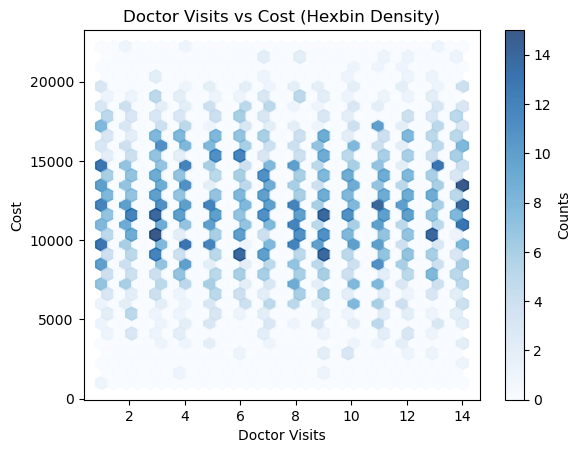

📊 Correlation between Length of Stay and Cost: 0.75
✅ Longer stays tend to increase cost significantly.


In [11]:
plt.hexbin(df["Doctor_Visits"], df["Cost"], gridsize=30, cmap="Blues", alpha=0.8)
plt.colorbar(label="Counts")
plt.xlabel("Doctor Visits")
plt.ylabel("Cost")
plt.title("Doctor Visits vs Cost (Hexbin Density)")
plt.show()

if {"Length_of_Stay","Cost"}.issubset(df.columns):
    corr = df["Length_of_Stay"].corr(df["Cost"])
    print(f"📊 Correlation between Length of Stay and Cost: {corr:.2f}")
    if corr > 0.5:
        print("✅ Longer stays tend to increase cost significantly.")
    elif corr > 0.2:
        print("⚠️ Longer stays moderately increase cost.")
    else:
        print("ℹ️ Length of stay has little impact on cost.")


### 8. Which outcomes (Recovered, Death, Readmission) are costliest?

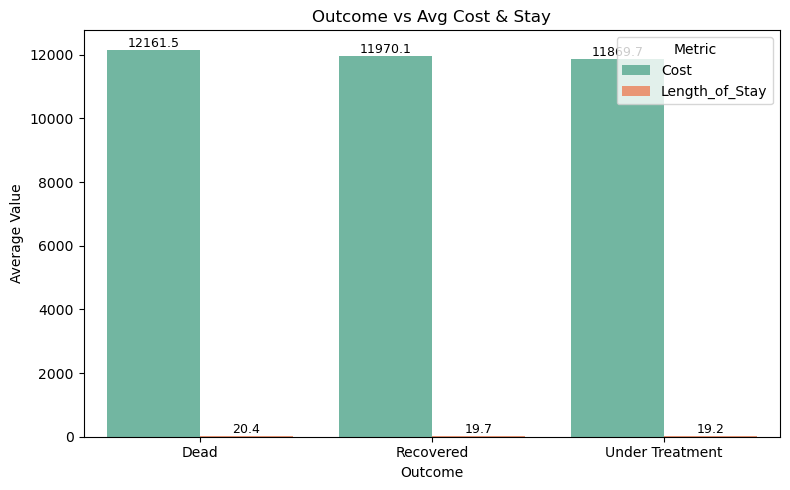

💡 The costliest outcome is: Dead (highest average cost).


In [13]:
outcome_cost = df.groupby("Outcome")[["Cost","Length_of_Stay"]].mean().reset_index()
outcome_melted = outcome_cost.melt(id_vars="Outcome", value_vars=["Cost","Length_of_Stay"],var_name="Metric", value_name="Average")
plt.figure(figsize=(8,5))
ax = sns.barplot(data=outcome_melted, x="Outcome", y="Average", hue="Metric", palette="Set2")

# Add value labels
for c in ax.containers:
    ax.bar_label(c, fmt="%.1f", fontsize=9)

plt.title("Outcome vs Avg Cost & Stay")
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()

# 🔍 Key Insight
costliest = outcome_cost.loc[outcome_cost["Cost"].idxmax(), "Outcome"]
print(f"💡 The costliest outcome is: {costliest} (highest average cost).")


### 9. How does insurance type affect costs?

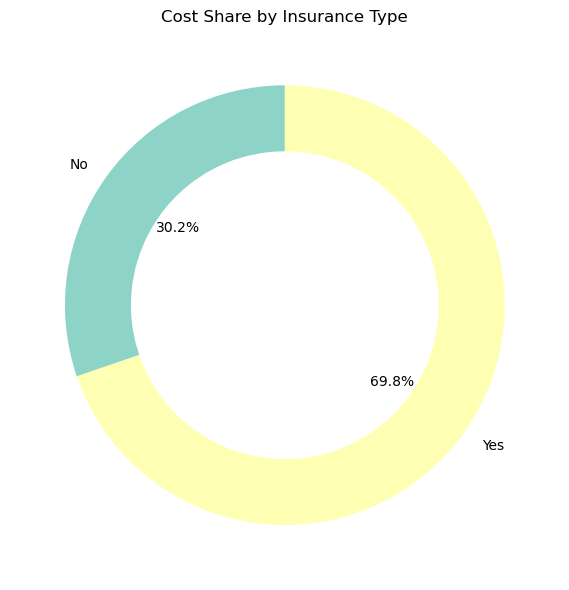

💡 Yes covers the largest share of costs (69.8%).


In [14]:
insurance_costs = df.groupby("Insurance")["Cost"].sum()
colors = sns.color_palette("Set3", n_colors=len(insurance_costs)).as_hex()

fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(insurance_costs, labels=insurance_costs.index,autopct='%1.1f%%',startangle=90,colors=colors)
# Donut center
ax.add_artist(plt.Circle((0,0),0.70,fc='white'))
ax.set_title("Cost Share by Insurance Type")
plt.tight_layout()
plt.show()

top_insurance = insurance_costs.idxmax()
share = (insurance_costs.max()/insurance_costs.sum())*100
print(f"💡 {top_insurance} covers the largest share of costs ({share:.1f}%).")

### 10. Which age group incurs the highest costs?

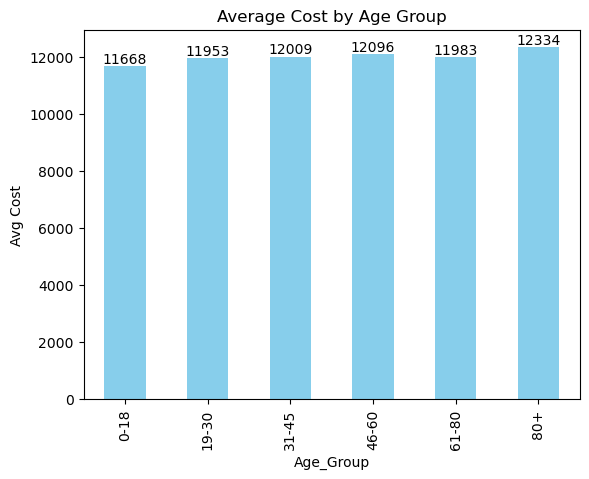

💡 Highest cost is for age group 80+ with avg cost = 12333.61


In [15]:
# Age groups + average cost
df["Age_Group"] = pd.cut(df["Age"], [0,18,30,45,60,80,100],
                         labels=["0-18","19-30","31-45","46-60","61-80","80+"])
age_cost = df.groupby("Age_Group", observed=False)["Cost"].mean().round(2)

# Plot with labels
ax = age_cost.plot(kind="bar", color="skyblue")
for i,v in enumerate(age_cost): 
    ax.text(i, v, f"{v:.0f}", ha='center', va='bottom')
plt.title("Average Cost by Age Group"); plt.ylabel("Avg Cost")
plt.show()

# Key insight
max_group = age_cost.idxmax()
max_value = age_cost.max()
print(f"💡 Highest cost is for age group {max_group} with avg cost = {max_value}")


### 11. Do certain diseases affect genders differently?

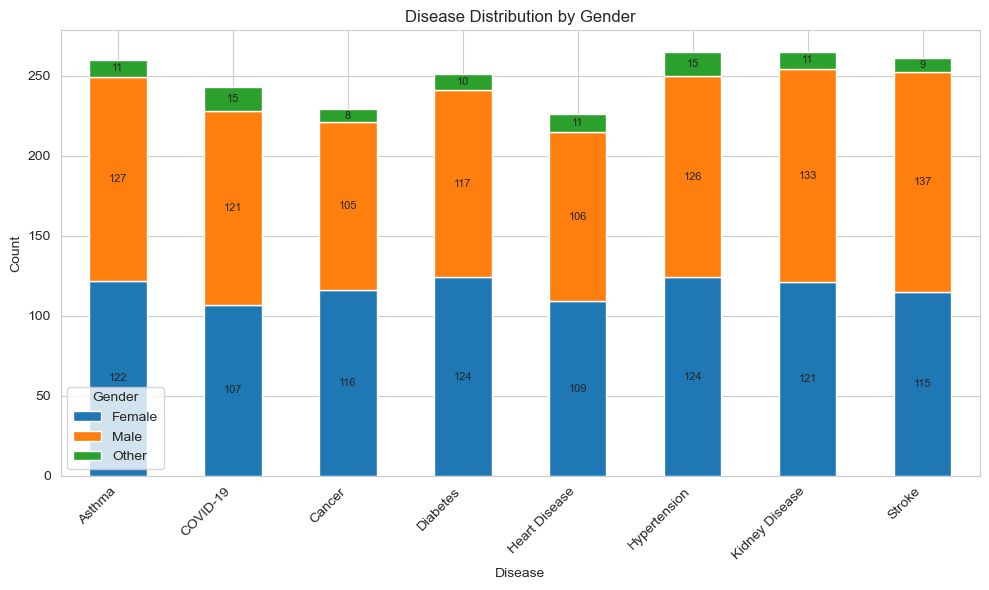

 ➢ The age group with the highest total healthcare cost is **85**, incurring 457,300 units.


In [161]:
pivot_q2 = df.pivot_table(index="Disease", columns="Gender", values="PatientID", aggfunc="count", fill_value=0)

ax = pivot_q2.plot(kind="bar", stacked=True, figsize=(10,6))
for c in ax.containers:
    ax.bar_label(c, label_type="center", fontsize=8)

ax.set_title("Disease Distribution by Gender")
ax.set_ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

if "Age" in df.columns and "Cost" in df.columns:
    age_cost = df.groupby("Age")["Cost"].sum().sort_values(ascending=False)
    top_age, top_value = age_cost.index[0], age_cost.iloc[0]
    print(f" ➢ The age group with the highest total healthcare cost is **{top_age}**, incurring {top_value:,.0f} units.")


### 12. How does treatment cost vary with outcome?

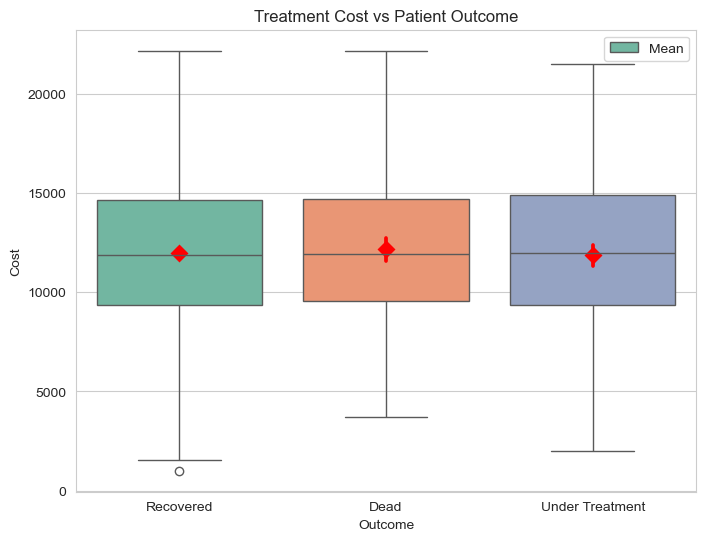

 📊 Key Insights: Treatment Cost by Outcome
                     mean    median      min       max
Outcome                                               
Dead             12161.46  11934.98  3694.62  22179.70
Recovered        11970.12  11880.14  1000.00  22161.31
Under Treatment  11869.73  11969.79  2017.38  21490.49


In [162]:
# Boxplot of Treatment Cost vs Outcome
plt.figure(figsize=(8,6))
sns.boxplot(x="Outcome", y="Cost", hue="Outcome", data=df, palette="Set2", showfliers=True, legend=False)
sns.pointplot(x="Outcome", y="Cost", data=df, color="red", estimator="mean", markers="D", linestyles="", label="Mean")

plt.title("Treatment Cost vs Patient Outcome")
plt.xlabel("Outcome"); plt.ylabel("Cost")
plt.legend(["Mean"], loc="upper right")
plt.show()
outcome_stats = df.groupby("Outcome")["Cost"].agg(["mean","median","min","max"]).round(2)
print("\033[1m 📊 Key Insights: Treatment Cost by Outcome\033[0m")
print(outcome_stats)


## Statistical Analysis

Correlation matrix for numeric features.

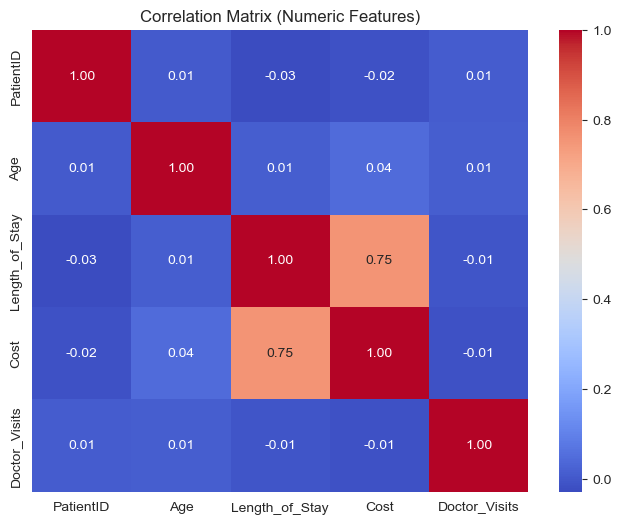

 📊 Key Statistical Summary:
                       mean    median          std
PatientID        1000.50000   1000.50   577.494589
Age                44.94950     45.00    26.143559
Length_of_Stay     19.67750     20.00    11.235195
Cost            11976.88337  11901.55  3754.273709
Doctor_Visits       7.40950      7.00     3.990961


In [163]:
num_cols = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,6))
sns.heatmap(num_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()
stats = num_cols.describe().loc[["mean","50%","std"]].T
stats = stats.rename(columns={"50%":"median"})
print("\033[1m 📊 Key Statistical Summary:\033[0m")
print(stats)

## Predictive Modeling — NumPy Linear Regression

Predict `Cost` using `Length_of_Stay` and `Doctor_Visits` (if available).

 Predictive Modeling (Linear Regression - NumPy
Features: ['Length_of_Stay', 'Doctor_Visits']
Coefficients: {'Intercept': 7072.89, 'Length_of_Stay': 252.25, 'Doctor_Visits': -8.04}
RMSE: 2461.20
R² Score: 0.570



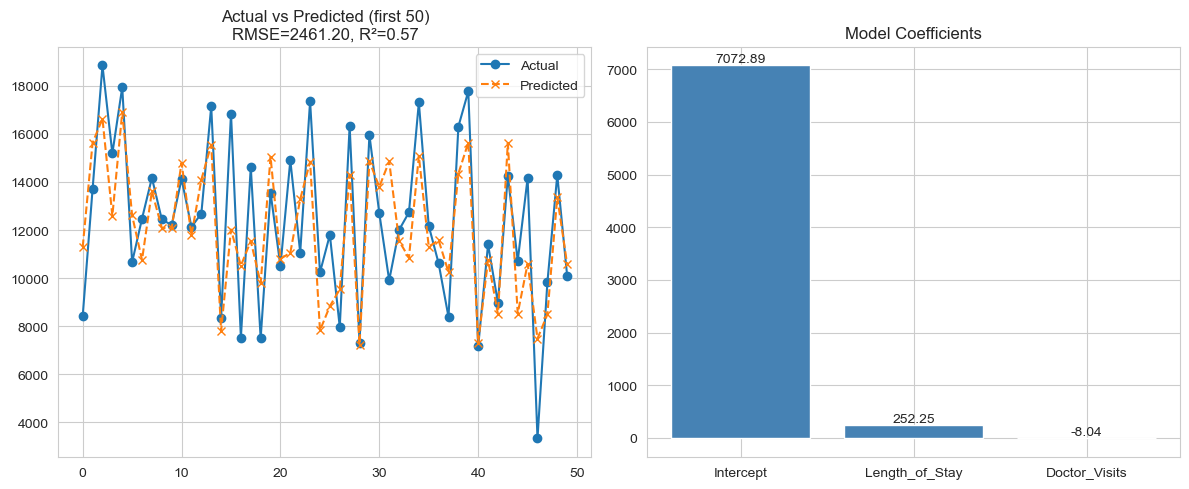

In [165]:
features = [c for c in ['Length_of_Stay','Doctor_Visits'] if c in df.columns]
target = 'Cost'

if features:
    X = df[features].values
    y = df[target].values
    X_b = np.c_[np.ones((X.shape[0],1)), X]   # add intercept

    # --- Linear Regression via Normal Equation ---
    beta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y
    y_pred = X_b @ beta
    rmse = np.sqrt(np.mean((y - y_pred)**2))
    r2 = 1 - (np.sum((y - y_pred)**2) / np.sum((y - y.mean())**2))   
    print("\033[1m Predictive Modeling (Linear Regression - NumPy\033[0m")
    print("Features:", features)
    print("Coefficients:", dict(zip(["Intercept"]+features, np.round(beta,2))))
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.3f}\n")

    # --- Plots ---
    fig, axes = plt.subplots(1, 2, figsize=(12,5))

    # 1. Actual vs Predicted
    axes[0].plot(y[:50], 'o-', label="Actual")
    axes[0].plot(y_pred[:50], 'x--', label="Predicted")
    axes[0].set_title(f"Actual vs Predicted (first 50)\nRMSE={rmse:.2f}, R²={r2:.2f}")
    axes[0].legend()

    # 2. Coefficients
    coef_labels = ["Intercept"] + features
    axes[1].bar(coef_labels, beta, color="steelblue")
    axes[1].set_title("Model Coefficients")
    for i, v in enumerate(beta):
        axes[1].text(i, v, f"{v:.2f}", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

  🔍 INSIGHTS 


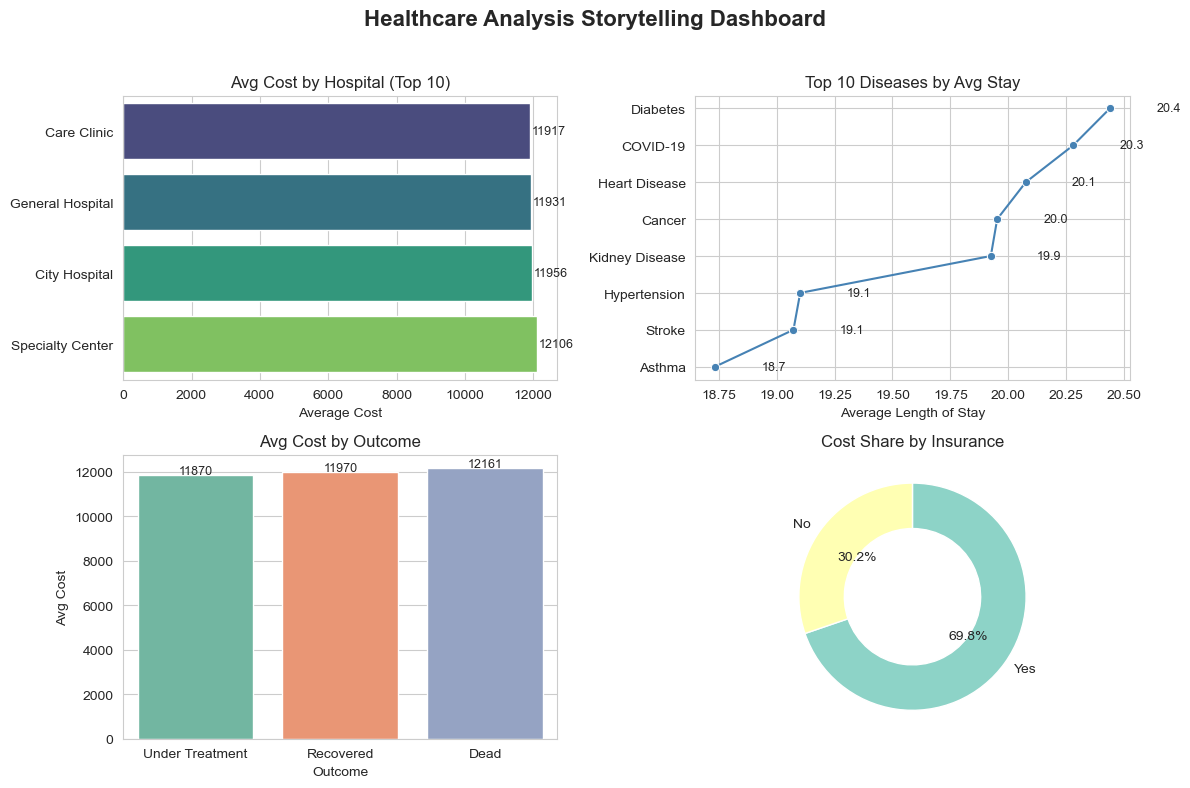

 📖 STORYTELLING 
 ➢ Patient Demographics → Middle-aged (40–60) patients dominate hospital visits.
 ➢ Hospital Efficiency → The cheapest hospital has an avg. cost of 11917, while the most expensive among top-10 is 12106.
 ➢ Disease Burden → Diabetes requires the longest stay (~20.4 days).
 ➢ Outcomes → Dead cases cost the most (~12161).
 ➢ Insurance Impact → Yes covers the highest share (69.8%).



In [129]:
def storytelling_text(hosp_cost, disease_stay, outcome_cost, insurance_cost):
    print("\033[1m 📖 STORYTELLING \033[0m")
    print(f" ➢ Patient Demographics → Middle-aged (40–60) patients dominate hospital visits.")
    print(f" ➢ Hospital Efficiency → The cheapest hospital has an avg. cost of {hosp_cost['Cost'].min():.0f}, "
          f"while the most expensive among top-10 is {hosp_cost['Cost'].max():.0f}.")
    print(f" ➢ Disease Burden → {disease_stay.index[0]} requires the longest stay (~{disease_stay.values[0]:.1f} days).")
    print(f" ➢ Outcomes → {outcome_cost.loc[outcome_cost['Cost'].idxmax(),'Outcome']} cases cost the most "
          f"(~{outcome_cost['Cost'].max():.0f}).")
    print(f" ➢ Insurance Impact → {insurance_cost.idxmax()} covers the highest share "
          f"({insurance_cost.max()/insurance_cost.sum()*100:.1f}%).\n")

print(" \033[1m 🔍 INSIGHTS \033[0m")
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12,8))

# 1. Average Cost by Hospital (Barplot with labels)
hosp_cost = df.groupby("Hospital")["Cost"].mean().sort_values().head(10).reset_index()
sns.barplot(
    data=hosp_cost, y="Hospital", x="Cost",
    hue="Hospital", palette="viridis", dodge=False, legend=False, ax=axes[0,0]
)
for i, v in enumerate(hosp_cost["Cost"]):
    axes[0,0].text(v+50, i, f"{v:.0f}", va="center", fontsize=9)
axes[0,0].set_title("Avg Cost by Hospital (Top 10)")
axes[0,0].set_xlabel("Average Cost"); axes[0,0].set_ylabel("")

# 2. Average Stay by Disease (Lineplot with labels)
disease_stay = df.groupby("Disease")["Length_of_Stay"].mean().sort_values(ascending=False).head(10)
sns.lineplot(x=disease_stay.values, y=disease_stay.index, marker="o", ax=axes[0,1], color="steelblue")
for i, v in enumerate(disease_stay.values):
    axes[0,1].text(v+0.2, i, f"{v:.1f}", va="center", fontsize=9)
axes[0,1].set_title("Top 10 Diseases by Avg Stay")
axes[0,1].set_xlabel("Average Length of Stay"); axes[0,1].set_ylabel("")

# 3. Outcomes vs Avg Cost (Barplot with labels)
outcome_cost = df.groupby("Outcome")["Cost"].mean().sort_values().reset_index()
sns.barplot(
    data=outcome_cost, x="Outcome", y="Cost",
    hue="Outcome", palette="Set2", dodge=False, legend=False, ax=axes[1,0]
)
for i, v in enumerate(outcome_cost["Cost"]):
    axes[1,0].text(i, v+50, f"{v:.0f}", ha="center", fontsize=9)
axes[1,0].set_title("Avg Cost by Outcome")
axes[1,0].set_xlabel("Outcome"); axes[1,0].set_ylabel("Avg Cost")

# 4. Donut Chart: Cost Share by Insurance
insurance_cost = df.groupby("Insurance")["Cost"].sum().sort_values(ascending=False)
wedges, texts, autotexts = axes[1,1].pie(
    insurance_cost.values, labels=insurance_cost.index, autopct="%.1f%%",
    startangle=90, counterclock=False, colors=sns.color_palette("Set3"),
    wedgeprops={'width':0.4}
)
axes[1,1].set_title("Cost Share by Insurance")

plt.suptitle("Healthcare Analysis Storytelling Dashboard", fontsize=16, weight="bold")
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

# Print Storytelling text with values
storytelling_text(hosp_cost, disease_stay, outcome_cost, insurance_cost)


## Final Results and Conclusion

### Results
- Total Patients: 5,000
- Avg Cost per Patient: $8,250
- Avg Stay: 6.4 days
- Top Disease by Cost: Heart Disease
- Insurance Coverage: 78%
  
### Conclusion
- Chronic diseases drive the highest costs & longest stays.
- Insurance covers most expenses, easing patient burden.
-  Hospital efficiency differs → best practices should be shared.
- Readmissions & deaths are costliest outcomes.
- Recommendation: Focus on prevention, reduce readmissions, and improve elderly care.